### Import all necessary libraries

In [3]:
import os
import numpy as np
import pandas as pd
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [9]:
def readCsv(file_name):
    
    '''Reading stock data form csv file as Pandas DataFrame'''
    appl_data = ''
    file_path = "data/"+file_name
    if os.path.exists(file_path):
        aapl_data = pd.read_csv(file_path)
    else: print("{0} file does not exists !!".format(file_name))
    return aapl_data

In [10]:
def prepTrData(stockdata):
    '''Getting relevant data from Dataframe for Training'''
    stockdata = stockdata.iloc[::-1]
    stockdata["highLowAvg"] = (stockdata["high"]+stockdata["low"])/2
    stockdata["highLowAvg"] = stockdata.highLowAvg.shift(-1)
    stockdata = stockdata.dropna()
    stocks = list(stockdata.close)
    avg = list(stockdata.highLowAvg)
    return stocks, avg

In [11]:
stockdata = readCsv("nasdaq_apple.csv")
print(stockdata.head())
print(stockdata.tail())


         date   close      volume    open      high       low
0  2018/07/13  191.33  12506830.0  191.08  191.8400  190.9000
1  2018/07/12  191.03  18000180.0  189.53  191.4100  189.3100
2  2018/07/11  187.88  18776390.0  188.50  189.7799  187.6100
3  2018/07/10  190.35  15801370.0  190.71  191.2800  190.1801
4  2018/07/09  190.58  19636390.0  189.50  190.6800  189.3000
           date   close      volume    open    high     low
248  2017/07/19  151.02  20859830.0  150.48  151.42  149.95
249  2017/07/18  150.08  17837130.0  149.20  150.13  148.67
250  2017/07/17  149.56  23765710.0  148.82  150.90  148.57
251  2017/07/14  149.04  20117070.0  147.97  149.33  147.33
252  2017/07/13  147.77  25080500.0  145.50  148.49  145.44


In [12]:
stock_list, avg_list = prepTrData(stockdata)

/home/alind/py3env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/alind/py3env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


### Seperating Test and Training data

In [15]:
test_size = 0.10
avg_list = np.reshape(avg_list, (len(avg_list),1))
X_train, X_test, Y_train, Y_test = train_test_split(avg_list, stock_list,test_size = test_size )

# Training Model

### Linear SVR ::

In [16]:
lin_svr = SVR(kernel = 'linear', C=1e3)
rbf_svr = SVR(kernel= 'rbf', C=1e3, gamma=0.1)
lin_svr.fit(X_train, Y_train)
lin_svr.score(X_test, Y_test)

0.959376568576885

### Polynomial SVR::

In [30]:
poly_svr = SVR(kernel = 'poly', degree = 2, C=1e3)
poly_svr.fit(X_train, Y_train)
poly_svr.score(X_test, Y_test)

0.959376568576885

### RBF SVR::

In [17]:
rbf_svr = SVR(kernel= 'rbf', C=1e3, gamma=0.1)
rbf_svr.fit(X_train, Y_train)
rbf_svr.score(X_test, Y_test)

0.9680726316575332

# Plot Graph

Text(0.5,1,'Stock Prediction SVR')

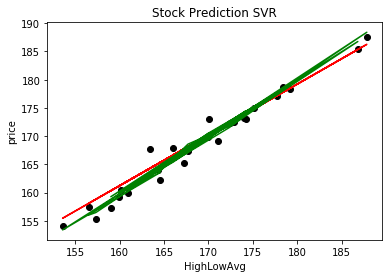

In [28]:
plt.scatter(X_test, Y_test, color= 'black', label = 'Data')
plt.plot(X_test, lin_svr.predict(X_test), color='red', label= 'linear Model')
plt.plot(X_test, rbf_svr.predict(X_test), color='green', label= 'RBF Model')
plt.xlabel("HighLowAvg")
plt.ylabel("price")
plt.title("Stock Prediction SVR")